In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

Using TensorFlow backend.


In [2]:
IMG_HELP_PATH = '/Users/shankar/dev/code/ds/studies/data_science/dlcv'
import os
import sys
sys.path.append(os.path.abspath(IMG_HELP_PATH))
from common.preprocessing import ImageToArrayPreprocessor
from common.preprocessing import AspectAwarePreprocessor
from common.datasets import SimpleDatasetLoader
from common.nn.conv import MiniVGGNet

In [3]:
DATASET = '../datasets/flowers17/images'

In [4]:
print("[INFO] Loading images")
imagePaths = list(paths.list_images(DATASET))
classNames = [ pt.split(os.path.sep)[-2] for pt in imagePaths]
classNames = [str(x) for x in np.unique(classNames)]

[INFO] Loading images


In [5]:
classNames

['bluebell',
 'buttercup',
 'coltsfoot',
 'cowslip',
 'crocus',
 'daffodil',
 'daisy',
 'dandelion',
 'fritillary',
 'iris',
 'lilyvalley',
 'pansy',
 'snowdrop',
 'sunflower',
 'tigerlily',
 'tulip',
 'windflower']

In [6]:
aap = AspectAwarePreprocessor(64, 64)
iap = ImageToArrayPreprocessor()

In [7]:
sdl = SimpleDatasetLoader(preprocessors=[aap, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

[INFO] processed 500/1360
[INFO] processed 1000/1360


In [8]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [9]:
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [10]:
print("[INFO] Compiling model")
opt = SGD(lr=0.05)
model = MiniVGGNet.build(width=64, height=64, depth=3, classes=len(classNames))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

[INFO] Compiling model


In [11]:
print("[INFO] Training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=100, verbose=1)

[INFO] Training network
Train on 1020 samples, validate on 340 samples
Epoch 1/100
1020/1020 [==============================] - 23s 22ms/step - loss: 3.0464 - acc: 0.2510 - val_loss: 2.6297 - val_acc: 0.3735
Epoch 2/100
1020/1020 [==============================] - 23s 22ms/step - loss: 1.8665 - acc: 0.4588 - val_loss: 2.1639 - val_acc: 0.4088
Epoch 3/100
1020/1020 [==============================] - 23s 23ms/step - loss: 1.3770 - acc: 0.5725 - val_loss: 1.9261 - val_acc: 0.4824
Epoch 4/100
1020/1020 [==============================] - 27s 27ms/step - loss: 1.0865 - acc: 0.6441 - val_loss: 2.0035 - val_acc: 0.4706
Epoch 5/100
1020/1020 [==============================] - 23s 23ms/step - loss: 0.8618 - acc: 0.7088 - val_loss: 1.5934 - val_acc: 0.5559
Epoch 6/100
1020/1020 [==============================] - 23s 22ms/step - loss: 0.7156 - acc: 0.7745 - val_loss: 1.6752 - val_acc: 0.5647
Epoch 7/100
1020/1020 [==============================] - 23s 22ms/step - loss: 0.5657 - acc: 0.7990 - val_l

In [12]:
print("[INFO] evaluating network")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=classNames))


[INFO] evaluating network
             precision    recall  f1-score   support

   bluebell       0.64      0.88      0.74        16
  buttercup       0.60      0.60      0.60        15
  coltsfoot       0.62      0.50      0.56        20
    cowslip       0.53      0.56      0.54        18
     crocus       0.50      0.60      0.55        20
   daffodil       0.59      0.43      0.50        23
      daisy       0.82      0.74      0.78        19
  dandelion       0.52      0.67      0.59        18
 fritillary       0.67      0.84      0.74        19
       iris       1.00      0.62      0.76        21
 lilyvalley       0.65      0.65      0.65        20
      pansy       1.00      0.63      0.77        27
   snowdrop       0.46      0.55      0.50        22
  sunflower       0.95      0.91      0.93        23
  tigerlily       0.94      0.94      0.94        16
      tulip       0.43      0.65      0.52        20
 windflower       0.89      0.74      0.81        23

avg / total       

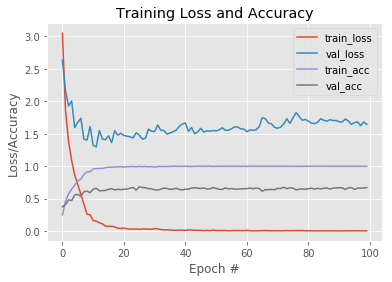

In [13]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()